In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

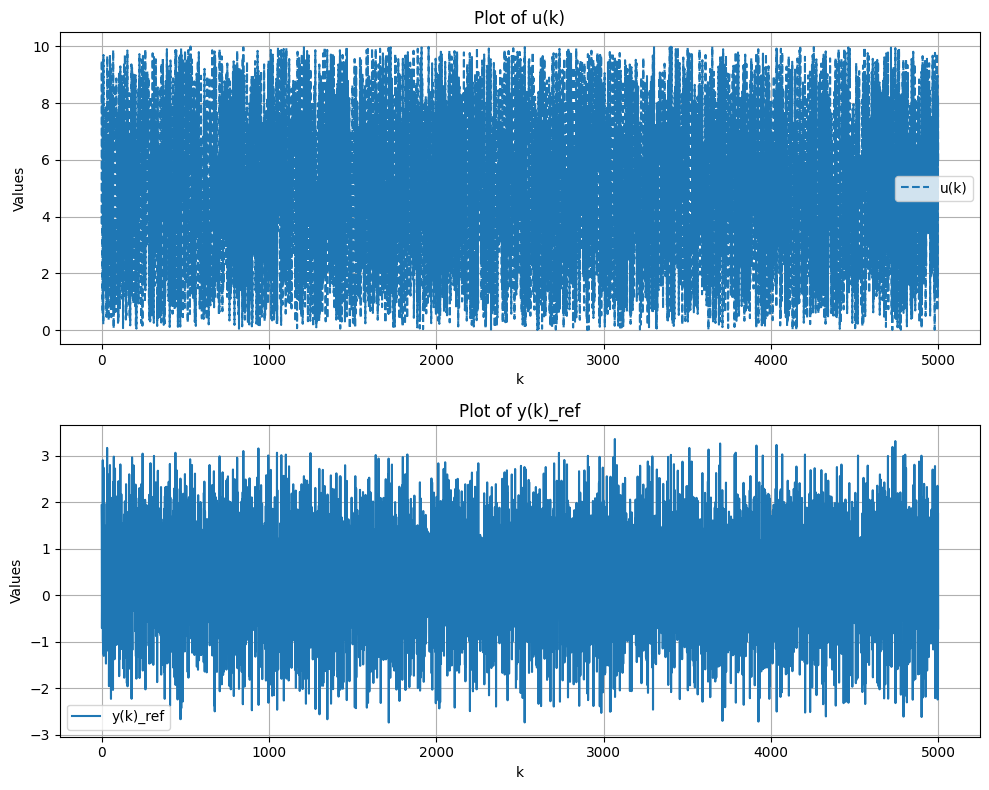

In [2]:
# Define the number of samples
k_max = 5000
jumlah_data_training=int(0.6*k_max)
jumlah_data_testing=int(0.4*k_max)
t = np.linspace(0, 10*np.pi, k_max)  # Time variable

# Define u(k) as a sine function
np.random.seed(42)
u_k =  10*np.random.rand(k_max)
y_k_ref= np.full(k_max, np.nan)
# Generate y(k) for k = 0 to k_max
for k in range(0, k_max):
    if k == 0:
        y_k_ref[k] = 1 / (1 + (0)**2) + 0.25 * u_k[k] - 0.3 * 0
    else:
        y_k_ref[k] = 1 / (1 + (y_k_ref[k-1])**2) + 0.25 * u_k[k] - 0.3 * u_k[k-1]
        
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot u_k in the first subplot
ax1.plot(range(k_max), u_k, label='u(k)', linestyle='--')
ax1.set_xlabel('k')
ax1.set_ylabel('Values')
ax1.set_title('Plot of u(k)')
ax1.legend()
ax1.grid(True)

# Plot y_k_ref in the second subplot
ax2.plot(range(k_max), y_k_ref, label='y(k)_ref', linestyle='-')
ax2.set_xlabel('k')
ax2.set_ylabel('Values')
ax2.set_title('Plot of y(k)_ref')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [3]:
np.min(y_k_ref)

-2.7366663105684492

In [4]:
# Normalization function
def normalize(data):
    return 2 * (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0)) - 1

def denormalize(normalized_data, data):
    return (normalized_data + 1) / 2 * (np.max(data, axis=0) - np.min(data, axis=0)) + np.min(data, axis=0)

def pergerseran_data(data):
    data_k_1=np.zeros_like(data)
    data_k_1[1:]=data[:-1]
    data_k_2=np.zeros_like(data)
    data_k_2[2:]=data[:-2]
    return data_k_1,data_k_2


In [5]:
# normalisasi
u_k_norm= normalize(u_k)
y_k_ref_norm = normalize(y_k_ref)
u_k_1_norm, u_k_2_norm= pergerseran_data(u_k_norm)
y_k_1_norm, y_k_2_norm= pergerseran_data(y_k_ref_norm)

data = np.float64(np.array([y_k_1_norm, y_k_2_norm, u_k_norm, u_k_1_norm, u_k_2_norm])).T
data_df= pd.DataFrame(data, columns=['y(k-1)', 'y(k-2)', 'u(k)', 'u(k-1)', 'u(k-2)'])
data_df

,y(k-1),y(k-2),u(k),u(k-1),u(k-2)
0,0.000000,0.000000,-0.250723,0.000000,0.000000
1,0.531852,0.000000,0.901964,-0.250723,0.000000
2,0.376919,0.531852,0.464395,0.901964,-0.250723
3,-0.333655,0.376919,0.197646,0.464395,0.901964
4,-0.112955,-0.333655,-0.687894,0.197646,0.464395
...,...,...,...,...,...
4995,-0.581359,0.380820,0.795299,-0.863102,0.297287
4996,0.669949,-0.581359,-0.761191,0.795299,-0.863102
4997,-0.837603,0.669949,-0.344145,-0.761191,0.795299
4998,0.102796,-0.837603,0.631947,-0.344145,-0.761191


In [6]:
data_df[:jumlah_data_training]

,y(k-1),y(k-2),u(k),u(k-1),u(k-2)
0,0.000000,0.000000,-0.250723,0.000000,0.000000
1,0.531852,0.000000,0.901964,-0.250723,0.000000
2,0.376919,0.531852,0.464395,0.901964,-0.250723
3,-0.333655,0.376919,0.197646,0.464395,0.901964
4,-0.112955,-0.333655,-0.687894,0.197646,0.464395
...,...,...,...,...,...
2995,-0.057766,-0.117372,0.731077,-0.736516,-0.206683
2996,0.798406,-0.057766,-0.685384,0.731077,-0.736516
2997,-0.786666,0.798406,-0.380265,-0.685384,0.731077
2998,0.057574,-0.786666,-0.419762,-0.380265,-0.685384


In [7]:
seed=42
def inisiasi_awal(jumlah_fitur, jumlah_hidden=2, jumlah_neuron=10, jumlah_output=1):
    weight={}
    bias={}
    # Inisiasi random untuk weight dan bias
    np.random.seed(seed)
    for i in range(1, jumlah_hidden+1):
        if i==1:
            weight["W%d"%i]=np.random.randn(jumlah_neuron, jumlah_fitur) *0.01
            bias["b%d"%i]=np.zeros((jumlah_neuron, 1))
        else:
            weight["W%d"%i]=np.random.randn(jumlah_neuron, jumlah_neuron) *0.01
            bias["b%d"%i]=np.zeros((jumlah_neuron, 1))
    
    weight["W%d"%(i+1)]=np.random.randn(jumlah_output, jumlah_neuron) *0.01
    bias["b%d"%(i+1)]=np.zeros((jumlah_output, 1))

    return weight, bias

# weight, bias= inisiasi_awal(jumlah_fitur=data_df.shape[1])

# for key, value in weight.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")

# for key, value in bias.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")

In [8]:
def tanh_activation(x):
    return np.divide((1-np.exp(-x)),(1+np.exp(- x)))
def tanh_derivative(x):
    g= np.divide(1-np.exp(-x), (1+np.exp(-x)))
    dummy=np.multiply((1+g), (1-g) )/2
    return dummy

def sigmoid_activation(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return np.multiply(sigmoid_activation(x), (1-sigmoid_activation(x)))

def relu_activation(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0, 1, 0)

def forward_propagation(weight, bias, X, fungsi_aktivasi="tanh"):
    A={"A0":X}
    z={}
    # layer input ke hidden layer
    jumlah_sampel=X.shape[0]
    jumlah_fitur=X.shape[1]
    for i in range(1, len(weight)+1):
        W=weight[f'W{i}']
        b=bias[f'b{i}']
        z[f'z{i}'] = (np.dot(W, A[f'A{i-1}'].T) + b).T
        if i==len(weight): # output layer
            A[f'A{i}']= z[f'z{i}'] # linear activation
        else: # hidden layer
            if fungsi_aktivasi=="tanh":
                A[f'A{i}']=tanh_activation(z[f'z{i}'])
            elif fungsi_aktivasi=="sigmoid":
                A[f'A{i}']=sigmoid_activation(z[f'z{i}'])
            elif fungsi_aktivasi=="relu":
                A[f'A{i}']=relu_activation(z[f'z{i}'])

        assert A[f'A{i}'].shape == (jumlah_sampel,W.shape[0]), ("shape  A salah !: "+str(A[f'A{i}'].shape) )

    return A,z

# A, z=forward_propagation(weight, bias, data)
# for key, value in z.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")
# for key, value in A.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")

In [9]:
def cost_function(Y_true, Y_pred):

    if not isinstance(Y_true, np.ndarray):
        Y_true=Y_true.to_numpy()
    assert Y_true.shape ==Y_pred.shape, ("shape  Y_prediksi salah !: "+str(Y_pred.shape) )

    return -np.mean(np.square(Y_true-Y_pred))

# last_key = sorted(A.keys())[-1]
# print(last_key)
# cost_error=cost_function(y_k_ref.reshape(-1,1), A[last_key])
# cost_error

In [10]:
def back_propagation(weight, bias, A,z, Y_true, fungsi_aktivasi="tanh"):
    dW = {}
    db = {}
    jumlah_sampel=A['A0'].shape[0]
    last_key = sorted(A.keys())[-1]
    Y_pred=A[last_key]
    if not isinstance(Y_true, np.ndarray):
        Y_true=Y_true.to_numpy()
    assert Y_true.shape ==Y_pred.shape, ("shape  Y_prediksi salah !: "+str(Y_pred.shape) )
    
    for i in reversed(range(1, len(weight) + 1)):
        if i == len(weight):  # output layer
            dz = Y_pred - Y_true
        else:  # hidden layer
            if fungsi_aktivasi=="tanh":
                dz = np.dot(weight[f'W{i+1}'].T, dz.T).T * tanh_derivative(z[f'z{i}'])
            elif fungsi_aktivasi=="sigmoid":
                dz = np.dot(weight[f'W{i+1}'].T, dz.T).T * sigmoid_derivative(z[f'z{i}'])
            elif fungsi_aktivasi=="relu":
                dz = np.dot(weight[f'W{i+1}'].T, dz.T).T * relu_derivative(z[f'z{i}'])
        dW[f'dW{i}'] = (2 / jumlah_sampel) * np.dot(dz.T, A[f'A{i-1}'])
        db[f'db{i}'] = (2 / jumlah_sampel)* np.sum(np.dot(dz.T, 1), axis=1, keepdims=True)
        assert dW[f'dW{i}'].shape == weight[f'W{i}'].shape, ("shape  dW2 salah !: " + str(dW[f'dW{i}'].shape))
 
    return dW, db

# dW,db=back_propagation(weight, bias, A,z, y_k_ref_norm.reshape(-1,1))

# for key, value in dW.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")
# for key, value in db.items():
#     if isinstance(value, np.ndarray):
#         print(f"{key}: {value.shape}")

In [11]:
def adam_initiate(weight, bias):
    v = {}
    s = {}
    L=len(weight)
    for l in range(0, L):
        v["dW" + str(l+1)] = np.zeros((weight["W" + str(l+1)]).shape)
        v["db" + str(l+1)] = np.zeros((bias["b" + str(l+1)]).shape)
        s["dW" + str(l+1)] = np.zeros((weight["W" + str(l+1)]).shape)
        s["db" + str(l+1)] = np.zeros((bias["b" + str(l+1)]).shape)
    return v, s

def adam_update(weight, bias, dW, db, v, s, learning_rate=0.001,t=1, beta1=0.9, beta2=0.999, epsilon=1e-6):

    v_corrected = {}                        
    s_corrected = {} 
    L=len(weight)
    for l in range(0, L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * dW["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * db["db" + str(l+1)]
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] /(1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] /(1 - beta1 ** t)
        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (np.square(dW["dW" + str(l+1)]) )
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (np.square(db["db" + str(l+1)]) )

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] /(1 - beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] /(1 - beta2 ** t)

        # Update parameters
        weight[f'W{l+1}'] = weight[f'W{l+1}'] - learning_rate *  v_corrected["dW" + str(l+1)] /(np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        bias[f'b{l+1}'] = bias[f'b{l+1}'] - learning_rate *  v_corrected["db" + str(l+1)] /(np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)
    
    return weight, bias
    

In [12]:
def batch_update(learning_rate, weight, bias, dW, db):

    for i in range(1, len(weight)+1):
        weight[f'W{i}'] = weight[f'W{i}'] - learning_rate * dW[f'dW{i}']
        bias[f'b{i}'] = bias[f'b{i}'] - learning_rate * db[f'db{i}']
    return weight, bias

In [13]:

y_k_ref_train = y_k_ref_norm[:jumlah_data_training].reshape(-1,1)
def training_adam(jumlah_hidden, jumlah_neuron, fungsi_aktivasi, batch_size=64):
    waktu_awal= time.time()
    weight, bias= inisiasi_awal(data_df.shape[1], jumlah_hidden, jumlah_neuron)
    v, s= adam_initiate(weight, bias)
    i=0
    cost_array=[]
    learning_rate=0.1
    learning_rate_decay=0.0001
    while i <= 10000:
        X= data_df[:jumlah_data_training].to_numpy()
        for j in range(0, X.shape[0], batch_size):
           # print("Iterasi ke-", i, "Batch ke-", j)
            X_batch= X[j:j+batch_size]
            y_k_ref_train_batch=y_k_ref_train[j:j+batch_size]
            A, z=forward_propagation(weight, bias, X_batch, fungsi_aktivasi)
            last_key = sorted(A.keys())[-1]
            y_k_pred=A[last_key]
            cost_error=cost_function(y_k_ref_train_batch, y_k_pred)
            cost_array.append(cost_error)
            dW,db=back_propagation(weight, bias, A,z, y_k_ref_train_batch, fungsi_aktivasi)
            weight, bias = adam_update(weight, bias, dW, db, v, s, learning_rate, i+1)

        if i%500==0 and i!=0:
            print("itersi ke-", i)
            print("cost error: ", cost_error)
            print("learning_rate:", learning_rate)
            learning_rate=learning_rate*1/(1+learning_rate_decay*i)
            
        i+=1
    waktu_iterasi= time.time()-waktu_awal
    print("Waktu Iterasi: ", waktu_iterasi)
    print("---------------------------------")
    return weight, bias, cost_array

def training_batch(jumlah_hidden, jumlah_neuron, fungsi_aktivasi):
    waktu_awal= time.time()
    weight, bias= inisiasi_awal(data_df.shape[1], jumlah_hidden, jumlah_neuron)
    i=0
    cost_array=[]
    learning_rate=0.1
    learning_rate_decay=0.0001
    while i <= 10000:
        X= data_df[:jumlah_data_training].to_numpy()
        A, z=forward_propagation(weight, bias, X, fungsi_aktivasi)
        last_key = sorted(A.keys())[-1]
        y_k_pred=A[last_key]
        cost_error=cost_function(y_k_ref_train, y_k_pred)
        cost_array.append(cost_error)
        dW,db=back_propagation(weight, bias, A,z, y_k_ref_train, fungsi_aktivasi)
        weight, bias =batch_update(0.1, weight, bias, dW, db)
        
        if i%500==0 and i!=0:
            print("itersi ke-", i)
            print("cost error: ", cost_error)
            print("learning_rate:", learning_rate)
            learning_rate=learning_rate*1/(1+learning_rate_decay*i)
            
        i+=1
    waktu_iterasi= time.time()-waktu_awal
    print("Waktu Iterasi: ", waktu_iterasi)
    print("---------------------------------")
    return weight, bias, cost_array

In [14]:
weight_2, bias_2, cost_array_2= training_adam(jumlah_hidden=1, jumlah_neuron=10, fungsi_aktivasi="tanh",batch_size=64)
#weight_1, bias_1, cost_array_1= training_batch(jumlah_hidden=1, jumlah_neuron=10, fungsi_aktivasi="tanh")

itersi ke- 500
cost error:  -7.737845607035499e-05
learning_rate: 0.1
itersi ke- 1000
cost error:  -5.994527644846921e-05
learning_rate: 0.09523809523809523
itersi ke- 1500
cost error:  -7.160177374071739e-05
learning_rate: 0.08658008658008656
itersi ke- 2000
cost error:  -5.7300224628505904e-05
learning_rate: 0.07528703180877093
itersi ke- 2500
cost error:  -4.8084858580939284e-05
learning_rate: 0.06273919317397578
itersi ke- 3000
cost error:  -8.696945007637964e-05
learning_rate: 0.050191354539180624
itersi ke- 3500
cost error:  -2.1783764466013233e-05
learning_rate: 0.03860873426090817
itersi ke- 4000
cost error:  -3.668387895532666e-05
learning_rate: 0.02859906241548753
itersi ke- 4500
cost error:  -2.345256439998589e-05
learning_rate: 0.020427901725348238
itersi ke- 5000
cost error:  -1.1432066609491933e-05
learning_rate: 0.014088208086447061
itersi ke- 5500
cost error:  -1.4536774154041944e-05
learning_rate: 0.009392138724298041
itersi ke- 6000
cost error:  -6.575744309428039e-06

In [15]:

cost_array_2[-1]

-1.2010691402165909e-06

In [16]:
X= data_df[:jumlah_data_training].to_numpy()
A, z=forward_propagation(weight_2, bias_2, X)
last_key = sorted(A.keys())[-1]
y_k_pred_train=A[last_key]
y_k_pred_train=denormalize(y_k_pred_train, y_k_ref[:].reshape(-1,1))
y_k_pred_train


array([[ 0.35104004],
       [ 1.46192402],
       [-0.70131988],
       ...,
       [ 0.49333482],
       [ 0.60663991],
       [ 2.04499317]])

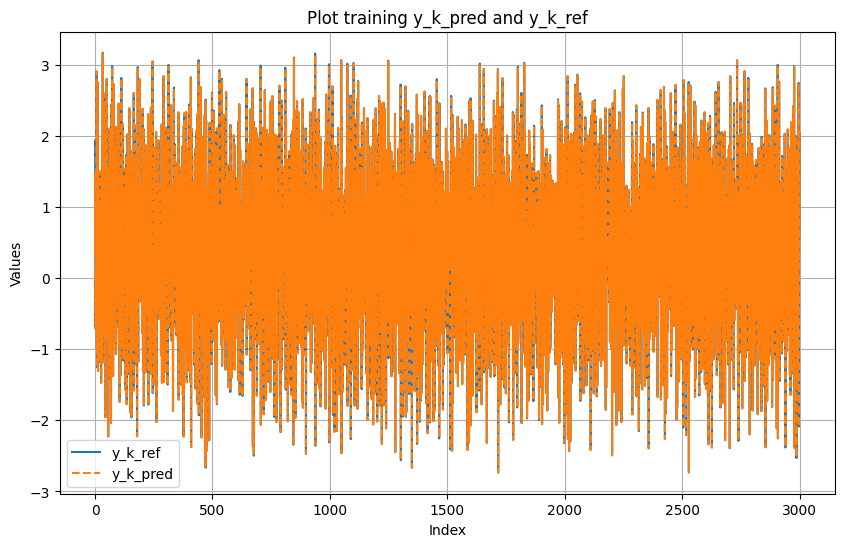

In [17]:
import pandas as pd


plt.figure(figsize=(10, 6))

# Plot y_k_pred
plt.plot(y_k_ref[:jumlah_data_training], label='y_k_ref', linestyle='-')
# Plot denormalized_y_k_pred
plt.plot(y_k_pred_train, label='y_k_pred', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot training y_k_pred and y_k_ref')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Display the plot
plt.show()

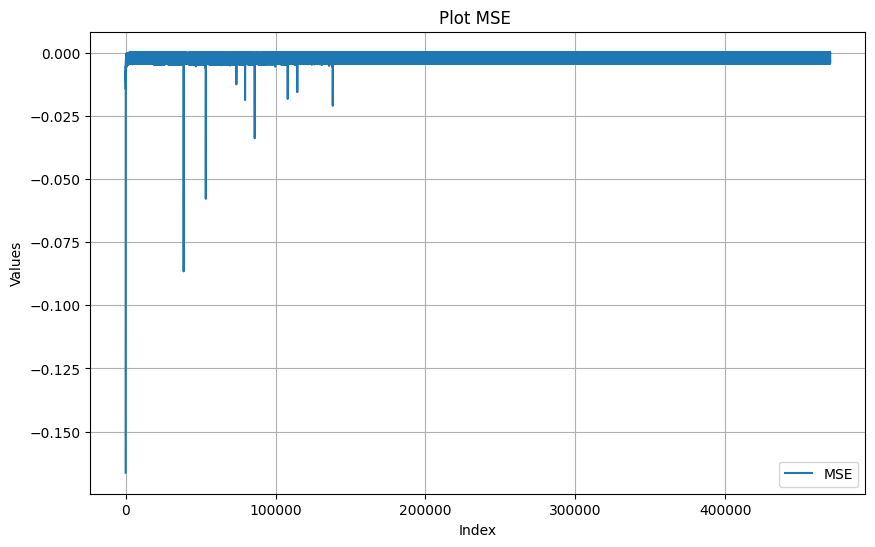

In [18]:
plt.figure(figsize=(10, 6))

# Plot denormalized_y_k_pred
plt.plot(cost_array_2, label='MSE')


# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot MSE ')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Display the plot
plt.show()

In [19]:
y_k_ref_test = y_k_ref_norm[-jumlah_data_testing:].reshape(-1,1)
print(y_k_ref_test.shape)
X_test= data_df[-jumlah_data_testing:].to_numpy()
A_test, _=forward_propagation(weight_2, bias_2, X_test)
last_key = sorted(A_test.keys())[-1]
y_k_pred_test=A_test[last_key]
cost_error=cost_function(y_k_ref_test, y_k_pred_test)
y_k_pred_test=denormalize(y_k_pred_test, y_k_ref[:].reshape(-1,1))
print(y_k_pred_test.shape)
print(cost_error)

(2000, 1)
(2000, 1)
-1.7353999676596603e-06


In [20]:
print(y_k_pred_test)
print(y_k_ref_test)

[[-0.74053435]
 [ 0.62211527]
 [-1.04468163]
 ...
 [ 0.62973829]
 [ 1.776145  ]
 [-0.71252811]]
[[-0.34517199]
 [ 0.10045042]
 [-0.4443944 ]
 ...
 [ 0.10279613]
 [ 0.47841212]
 [-0.33652222]]


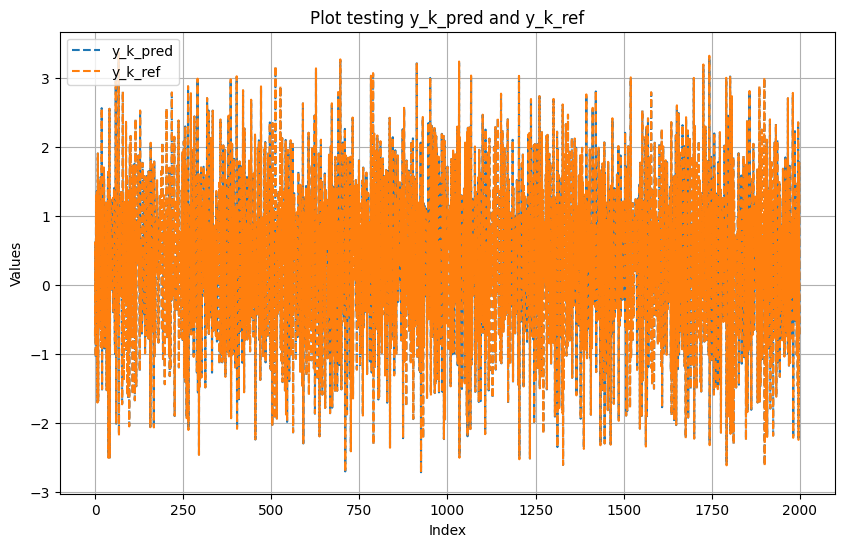

In [21]:
import pandas as pd


plt.figure(figsize=(10, 6))

# Plot denormalized_y_k_pred
plt.plot(y_k_pred_test, label='y_k_pred', linestyle='--')

# Plot y_k_pred
plt.plot(y_k_ref[-jumlah_data_testing:], label='y_k_ref', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot testing y_k_pred and y_k_ref')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Display the plot
plt.show()

In [23]:
import json
import numpy as np

# Assuming W1, W2, b1, and b2 are already defined as numpy arrays
weight_bias_dict = {
}
weight_bias_dict.update(weight_2)
weight_bias_dict.update(bias_2)
for key, value in weight_bias_dict.items():
    weight_bias_dict[key] = value.tolist() 
print(weight_bias_dict)

# Specify the file name
file_name = 'dummy.json'

# Open the file in write mode
with open(file_name, 'w') as file:
    # Write the dictionary to the file in JSON format
    json.dump(weight_bias_dict, file)

{'W1': [[-0.001836220911769934, -9.206001725073723e-05, -0.00010606145820151936, 0.0007772493163054083, -0.0009928848359185608], [-0.0008714622694313459, -3.940736829351161e-05, -4.607408810756828e-05, 0.0003693152272771612, -0.0004752003774856153], [0.002147449005155637, 0.0001077844416836632, 0.00012452596031575972, -0.0009091682365299666, 0.0011609432997878838], [0.03969430179738655, -9.68460898771224e-05, 0.31753066851470513, -0.08236863283094717, -0.01349374489690554], [-8.894677440927554, 0.002432220250144418, -0.00598631929327979, -0.001440527007915597, 0.00031642846626994393], [-2.849128110478815, 0.003581534826392154, 0.002904086147247025, -0.006507345081839072, 0.0053822510566301635], [-6.63843765257587, -0.0030828768199196274, -0.002263375629411027, 0.004096854011196822, -0.00047493165150227357], [-0.0017319213562444974, -8.677558299466046e-05, -9.98881327302951e-05, 0.0007330554869802952, -0.0009365691441668828], [-0.10241075206581898, 0.0003987608732593755, -0.056665259607